In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [8]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df[df.isnull()].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

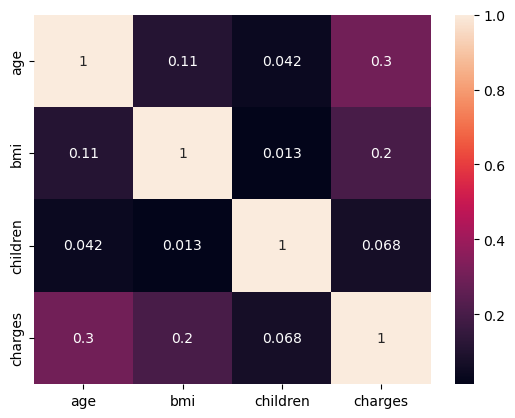

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

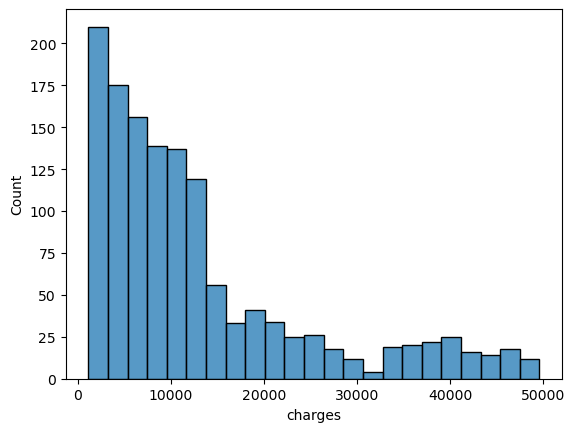

In [33]:
sns.histplot(df['charges'])
plt.show()

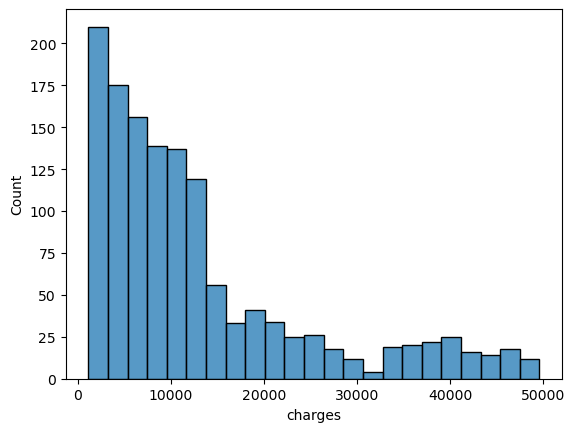

In [32]:
df = df[df.charges <50000]
sns.histplot(df['charges'])
plt.show()

In [38]:
df = pd.get_dummies(df, columns=['sex', 'smoker','region'], drop_first=True, dtype='int64')

In [39]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

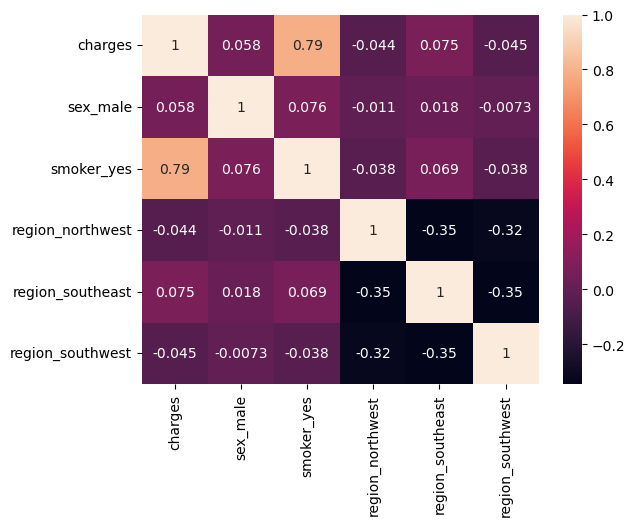

In [50]:
sns.heatmap(df.drop(columns=['age','bmi','children']).corr(), annot=True)

## Entrenar el modelo 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df['charges']
x = df.drop(columns=['charges'])

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123)
print(len(x),len(x_test))


1331 267


In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_stand = sc_x.fit_transform(x_train)
y_train_stand = sc_y.fit_transform(np.array(y_train).reshape(-1,1))


array([[ 0.50074021],
       [-0.45262948],
       [-0.83981455],
       ...,
       [-0.77957096],
       [ 0.7483559 ],
       [-0.24173271]])

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(x_train_stand,y_train_stand)

LinearRegression()

In [78]:
lr.coef_

array([[ 0.31563551,  0.16517609,  0.04258837, -0.00540032,  0.79388577,
        -0.01946811, -0.03826074, -0.0330545 ]])

In [79]:
lr.intercept_

array([7.54618181e-19])

In [84]:
predict_std = lr.predict(sc_x.fit_transform(x_test))
y_predict = sc_y.inverse_transform(predict_std)


In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7206450270160645

In [ ]:
y_test

710      1727.54000
353     12404.87910
310      8444.47400
31       2198.18985
1039    22493.65964
           ...     
627     11326.71487
508      3044.21330
1120    34166.27300
1163     2200.83085
207     20984.09360
Name: charges, Length: 267, dtype: float64

In [100]:
np.array(y_test).reshape(-1,1)

array([[ 1727.54   ],
       [12404.8791 ],
       [ 8444.474  ],
       [ 2198.18985],
       [22493.65964],
       [19442.3535 ],
       [15359.1045 ],
       [ 4260.744  ],
       [ 3471.4096 ],
       [ 7727.2532 ],
       [18328.2381 ],
       [ 1704.70015],
       [13204.28565],
       [ 5028.1466 ],
       [ 2719.27975],
       [ 4719.73655],
       [11658.37915],
       [ 9361.3268 ],
       [ 8277.523  ],
       [12829.4551 ],
       [ 7151.092  ],
       [ 4151.0287 ],
       [ 3659.346  ],
       [38709.176  ],
       [17085.2676 ],
       [ 8703.456  ],
       [41949.2441 ],
       [ 2775.19215],
       [ 3062.50825],
       [ 4667.60765],
       [23306.547  ],
       [ 5266.3656 ],
       [12815.44495],
       [ 5240.765  ],
       [15612.19335],
       [23967.38305],
       [ 7512.267  ],
       [ 4686.3887 ],
       [ 6877.9801 ],
       [46200.9851 ],
       [ 5003.853  ],
       [16586.49771],
       [ 4571.41305],
       [14426.07385],
       [36307.7983 ],
       [14

<Axes: ylabel='Count'>

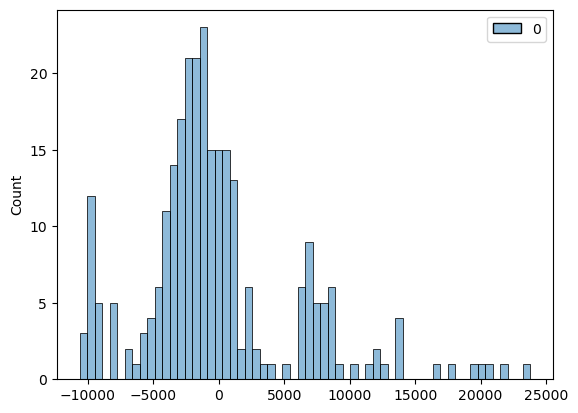

In [103]:
res = np.array(y_test).reshape(-1,1) - y_predict
sns.histplot(res,bins=60)

In [104]:
from scipy.stats import shapiro, normaltest, anderson, kstest

# Ejemplo de datos (residuos)
residuos = np.random.normal(0, 1, 100)  # Cambia por tus residuos

# 1. Shapiro-Wilk Test
shapiro_test = shapiro(residuos)
print('Shapiro-Wilk Test:')
print(f'Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}')

# 2. Kolmogorov-Smirnov Test
kstest_result = kstest(residuos, 'norm')
print('\nKolmogorov-Smirnov Test:')
print(f'Estadístico: {kstest_result.statistic}, p-valor: {kstest_result.pvalue}')

# 3. Anderson-Darling Test
anderson_result = anderson(residuos, dist='norm')
print('\nAnderson-Darling Test:')
print(f'Estadístico: {anderson_result.statistic}')
print('Valores críticos:', anderson_result.critical_values)
print('Niveles de significancia:', anderson_result.significance_level)

# 4. D’Agostino and Pearson’s Test
dagostino_test = normaltest(residuos)
print('\nD’Agostino and Pearson Test:')
print(f'Estadístico: {dagostino_test.statistic}, p-valor: {dagostino_test.pvalue}')


Shapiro-Wilk Test:
Estadístico: 0.9884012944378886, p-valor: 0.5382506542331248

Kolmogorov-Smirnov Test:
Estadístico: 0.0672564800815984, p-valor: 0.7304750149762121

Anderson-Darling Test:
Estadístico: 0.3085117980525922
Valores críticos: [0.555 0.632 0.759 0.885 1.053]
Niveles de significancia: [15.  10.   5.   2.5  1. ]

D’Agostino and Pearson Test:
Estadístico: 2.5344055490950135, p-valor: 0.28161827084315033
